In [1]:
from google.colab import drive
drive.mount('/content/ggdrive', force_remount=True)

Mounted at /content/ggdrive


In [ ]:
DATA_TRAIN = "/content/ggdrive/MyDrive/20211/rec-sys/mid-term/data/MINDsmall_train/"

In [ ]:
import pandas as pd

data = pd.read_csv(DATA_TRAIN + "news.tsv", header=None, sep='\t')

data.columns=['News ID',
             'Category',
             'SubCategory',
             'Title',
             'Abstract',
             'URL',
             'Title Entities',
             'Abstract Entities']

In [ ]:
data.head(5)

,News ID,Category,SubCategory,Title,Abstract,URL,Title Entities,Abstract Entities
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik..."
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...",https://assets.msn.com/labs/mind/AACk2N6.html,[],"[{""Label"": ""National Basketball Association"", ..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...",https://assets.msn.com/labs/mind/AAAKEkt.html,"[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI...","[{""Label"": ""Skin tag"", ""Type"": ""C"", ""WikidataI..."


In [ ]:
# cái entity kia tạm thời k dùng nhé 

data = data[["News ID","Category","SubCategory","Title","Abstract"]]
data.head()

,News ID,Category,SubCategory,Title,Abstract
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the..."
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re..."


In [ ]:
data.count()

# abstract có một số bài k có 

News ID        51282
Category       51282
SubCategory    51282
Title          51282
Abstract       48616
dtype: int64

In [ ]:
cate_counnt = data[['Category','SubCategory']].value_counts()
cate_counnt

Category   SubCategory                 
news       newsus                          6564
sports     football_nfl                    5420
news       newspolitics                    2826
           newscrime                       2254
weather    weathertopstories               2047
                                           ... 
lifestyle  lifestylehoroscopefish             1
travel     traveltrivia                       1
news       causes-disaster-relief             1
finance    finance-startinvesting             1
news       causes-military-appreciation       1
Length: 283, dtype: int64

In [ ]:
import numpy as np

index=[]
for i in cate_counnt.index:
    index.append(np.array(i))
index=np.array(index)

# Generate custom dataframe from value counts index
cate_count_df = pd.DataFrame(columns=['Category',
                            'Sub Category',
                            'Values'])
cate_count_df['Category']=index[:,0]
cate_count_df['Sub Category']=index[:,1]
cate_count_df['Values']=cat.values

# Examine dataframe: Top 5 rows
cate_count_df.head(5)

,Category,Sub Category,Values
0,news,newsus,6564
1,sports,football_nfl,5420
2,news,newspolitics,2826
3,news,newscrime,2254
4,weather,weathertopstories,2047


In [ ]:
# thể hiện phân bổ sub-cate trong cate đó 

import plotly.express as px
px.bar(data_frame=cate_count_df,
       x='Category',
       y='Values',
       color='Sub Category')

(array([8.8900e+02, 1.5791e+04, 4.4760e+03, 1.9351e+04, 5.1550e+03,
        0.0000e+00, 2.4790e+03, 2.0000e+00, 0.0000e+00, 3.1390e+03]),
 array([ 2. ,  3.1,  4.2,  5.3,  6.4,  7.5,  8.6,  9.7, 10.8, 11.9, 13. ]),
 <a list of 10 Patch objects>)

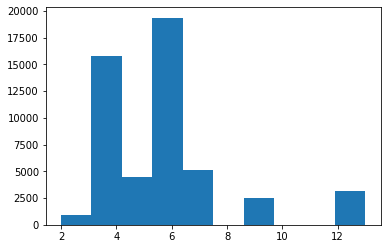

In [ ]:
cate_list_length=[]
for topic in data['Category']:
    cate_list_length.append(len(topic))

import matplotlib.pyplot as plt

plt.hist(cate_list_length,10)

(array([8.300e+01, 2.080e+02, 7.300e+02, 1.234e+03, 2.713e+03, 3.873e+03,
        6.920e+03, 7.727e+03, 6.600e+03, 6.493e+03, 4.601e+03, 4.249e+03,
        2.321e+03, 1.601e+03, 6.900e+02, 5.110e+02, 2.200e+02, 1.290e+02,
        1.330e+02, 6.800e+01, 6.500e+01, 2.900e+01, 2.400e+01, 9.000e+00,
        1.400e+01, 1.100e+01, 6.000e+00, 4.000e+00, 3.000e+00, 5.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 11.  ,  17.44,  23.88,  30.32,  36.76,  43.2 ,  49.64,  56.08,
         62.52,  68.96,  75.4 ,  81.84,  88.28,  94.72, 101.16, 107.6 ,
        114.04, 120.48, 126.92, 133.36, 139.8 , 146.24, 152.68, 159.12,
        165.56, 172.  , 178.44, 184.88, 191.32, 197.76, 204.2 , 210.64,
        217.08, 223.52, 229.96, 236.4 , 242.84, 249.28, 255.72, 262.16,
        268.6 , 

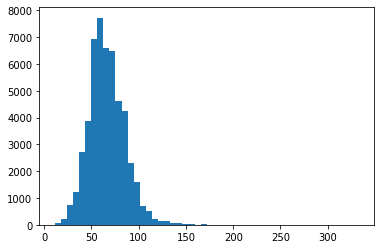

In [ ]:
title_list_length=[]
for topic in data['Title']:
    title_list_length.append(len(topic))

import matplotlib.pyplot as plt

plt.hist(title_list_length,50)

In [ ]:
max_lenth = max(title_list_length)
print("max len = ",max_lenth)
index_maxlength = title_list_length.index(max_lenth)
data["Title"].iloc[index_maxlength]

max len =  333


'The Price You Pay: The spiraling cost of college\tIn our new series, The Price You Pay," we look at the rising cost of attending a public college, which has risen ten-fold since 1965. Tony Dokoupil reports on how amenities at some universities, aimed at attracting more students, are adding to the spiralling cost of higher education.'

In [ ]:
data['Abstract'].fillna("")

0        Shop the notebooks, jackets, and more that the...
1        These seemingly harmless habits are holding yo...
2        Lt. Ivan Molchanets peeked over a parapet of s...
3        I felt like I was a fraud, and being an NBA wi...
4        They seem harmless, but there's a very good re...
                               ...                        
51277    Woolsey Fire Anniversary: A community is forev...
51278                                                     
51279    Sometimes, what happens on the sidelines can b...
51280    Mark, Jeremiah and Casey were so excited they ...
51281                                                     
Name: Abstract, Length: 51282, dtype: object

(array([6.0640e+03, 9.9420e+03, 1.2674e+04, 4.8810e+03, 2.1940e+03,
        1.0260e+03, 8.1700e+02, 5.3090e+03, 8.0850e+03, 4.9000e+01,
        2.5000e+01, 2.9000e+01, 3.7000e+01, 2.1000e+01, 1.7000e+01,
        2.2000e+01, 1.7000e+01, 1.3000e+01, 6.0000e+00, 5.0000e+00,
        9.0000e+00, 5.0000e+00, 5.0000e+00, 2.0000e+00, 3.0000e+00,
        1.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00, 3.0000e+00,
        1.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([1.00000e+00, 5.30400e+01, 1.05080e+02, 1.57120e+02, 2.09160e+02,
        2.61200e+02, 3.13240e+02, 3.65280e+02, 4.17320e+02, 4.69360e+02,
        5.21400e+02, 5.73440e+02, 6.25480e+02, 6.77520e+02, 7.29560e+02,
        7.81600e+02, 8.33640e+02, 8.85680e+02, 9.37720e+02, 9.89760e+02,
        1.04180e+03, 1.093

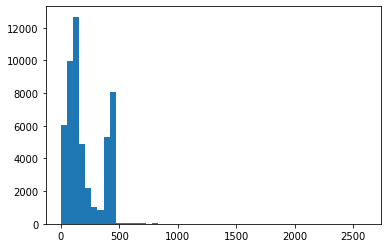

In [ ]:
abstract_list_length=[]
for ab in data['Abstract']:
    abstract_list_length.append(len(str(ab)))

import matplotlib.pyplot as plt

plt.hist(abstract_list_length,50)

In [ ]:
import altair as alt


brush = alt.selection(type='interval')

sp2 = alt.Chart(cate_count_df).mark_point().encode(
    x='Values',
    y='Category:N',
    color=alt.condition(brush, 'Category', 
                        alt.value('grey')),
).add_selection(brush)

sp2

alt.Chart(...)

In [ ]:
brush = alt.selection(type='interval')
base = alt.Chart(cate_count_df).add_selection(brush)

# Configure the points
points = base.mark_point().encode(
    x=alt.X('Values', title='Count'),
    y=alt.Y('Category', title=''),
    color=alt.condition(brush, 'Category', alt.value('grey'))
)

# Configure the ticks
tick_axis = alt.Axis(labels=False, domain=False, ticks=False)

x_ticks = base.mark_tick().encode(
    alt.X('Values', axis=tick_axis),
    alt.Y('Category', title='Category Tick', axis=tick_axis),
    color=alt.condition(brush, 'Category', alt.value('lightgrey'))
)

y_ticks = base.mark_tick().encode(
    alt.X('Category', title='Category Tick', axis=tick_axis),
    alt.Y('Values', axis=tick_axis),
    color=alt.condition(brush, 'Category', alt.value('lightgrey'))
)

# Build the chart
y_ticks | (points & x_ticks)

alt.HConcatChart(...)

In [ ]:
brush = alt.selection(type='interval')
base = alt.Chart(cate_count_df).add_selection(brush)

# Configure the points
points = base.mark_point().encode(
    x=alt.X('Values', title='Count'),
    y=alt.Y('Sub Category', title=''),
    color=alt.condition(brush, 'Category', alt.value('grey'))
)

# Configure the ticks
tick_axis = alt.Axis(labels=False, domain=False, ticks=False)

x_ticks = base.mark_tick().encode(
    alt.X('Values', axis=tick_axis),
    alt.Y('Category', title='Category Tick', axis=tick_axis),
    color=alt.condition(brush, 'Category', alt.value('lightgrey'))
)

y_ticks = base.mark_tick().encode(
    alt.X('Category', title='Category Tick', axis=tick_axis),
    alt.Y('Values', axis=tick_axis),
    color=alt.condition(brush, 'Category', alt.value('lightgrey'))
)

# Build the chart
y_ticks | (points & x_ticks)

alt.HConcatChart(...)

In [ ]:
click = alt.selection_multi(encodings=['color'])

bar = alt.Chart(cate_count_df).mark_bar().encode(
    x='count()',
    y='Category:N',
    color=alt.condition(click, 
                        'Sub Category', 
                        alt.value('lightgray')),
).add_selection(click)

bar

alt.Chart(...)

In [ ]:
line = alt.Chart(cate_count_df).mark_line().encode(
    x='Values',
    y='Category:N',
    color='Category',
    strokeDash='Category',
)

line

alt.Chart(...)